<a href="https://colab.research.google.com/github/Celsius1313/AdvancedAnalyticsML01/blob/main/01_Case_Study_Cardio_Good_Fitness_PGP_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Case Study: Cardio Good Fitness -- PGP - AIML - EDA: Exploratory Data Analysis**



In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [ ]:
# Converting a column data type
pd.to_numeric(df[nome_coluna], errors='raise').astype(int)

In [4]:
uploaded = files.upload()
path = "01_CardioGoodFitness.csv"
file = pd.read_csv(path)

Saving 01_CardioGoodFitness.csv to 01_CardioGoodFitness.csv


In [5]:
file.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
file.describe().T # .describe() by default only presents the quatitative variables/continuos information description

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


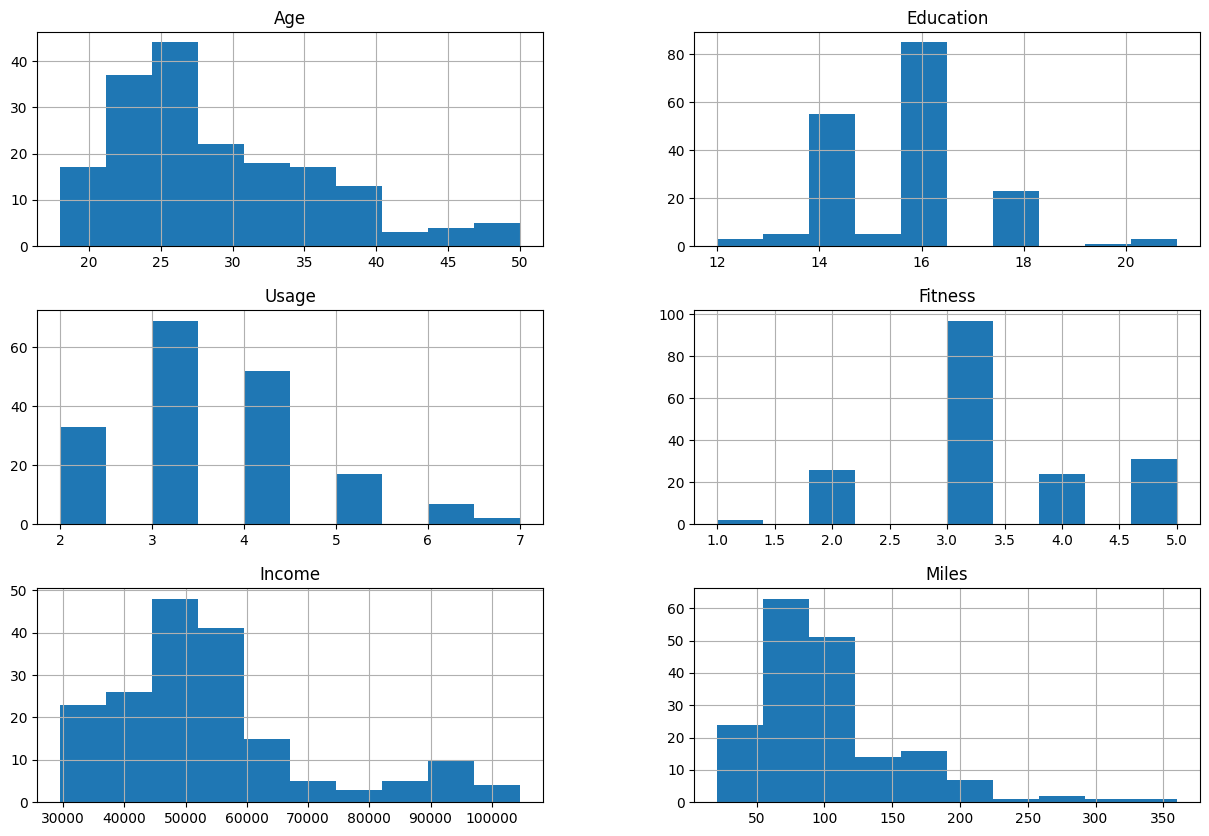

In [7]:
# Histgram only show us the visualization about continuos or quantitative variables and their frequency
file.hist(figsize=(15,10));

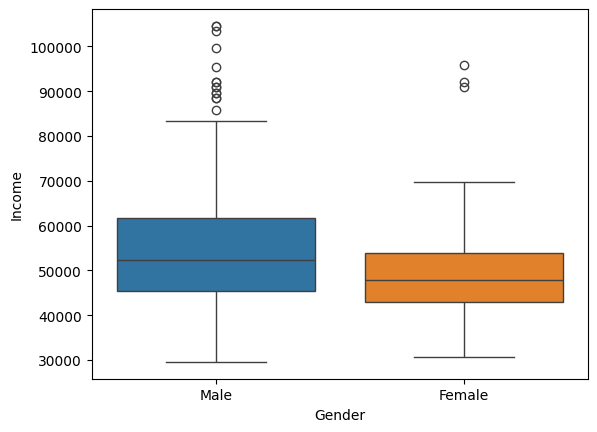

In [11]:
# Boxplot show us the distribution of the data, and allowed us identifying the OUTLIERS, Max, Min and where are located the 50% of the data (I= Q3 -q1)
sns.boxplot(x="Gender", y="Income", data=file, hue="Gender");
#sns.boxplot(x="MaritalStatus", y="Income", data=file, hue="MaritalStatus");

In [ ]:
# Cross table give to us the possibility to check the frequency of combination between 2 categorical variables or feature
print(pd.crosstab(file['Product'], file['Gender']))
print("\n")
print(pd.crosstab(file['Product'], file['MaritalStatus']))

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


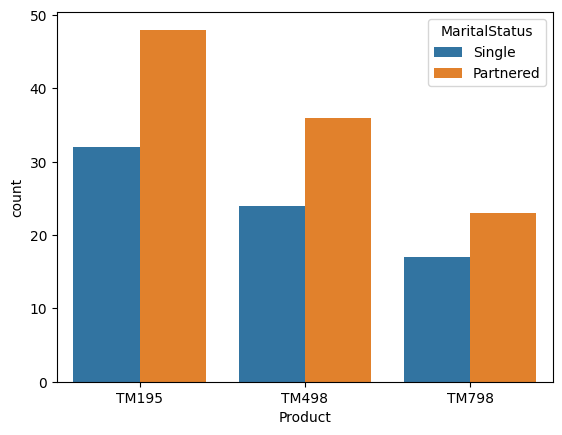

In [12]:
# Plot or give us the visualization about the data used in .crosstab() function
sns.countplot(x="Product", hue="MaritalStatus", data=file);

In [ ]:
# This piece of script show us the mean observed by using a costumized pivot table
pd.pivot_table(file, values="Income", index=["Product", "Gender"], columns="MaritalStatus")

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

<Figure size 700x500 with 0 Axes>

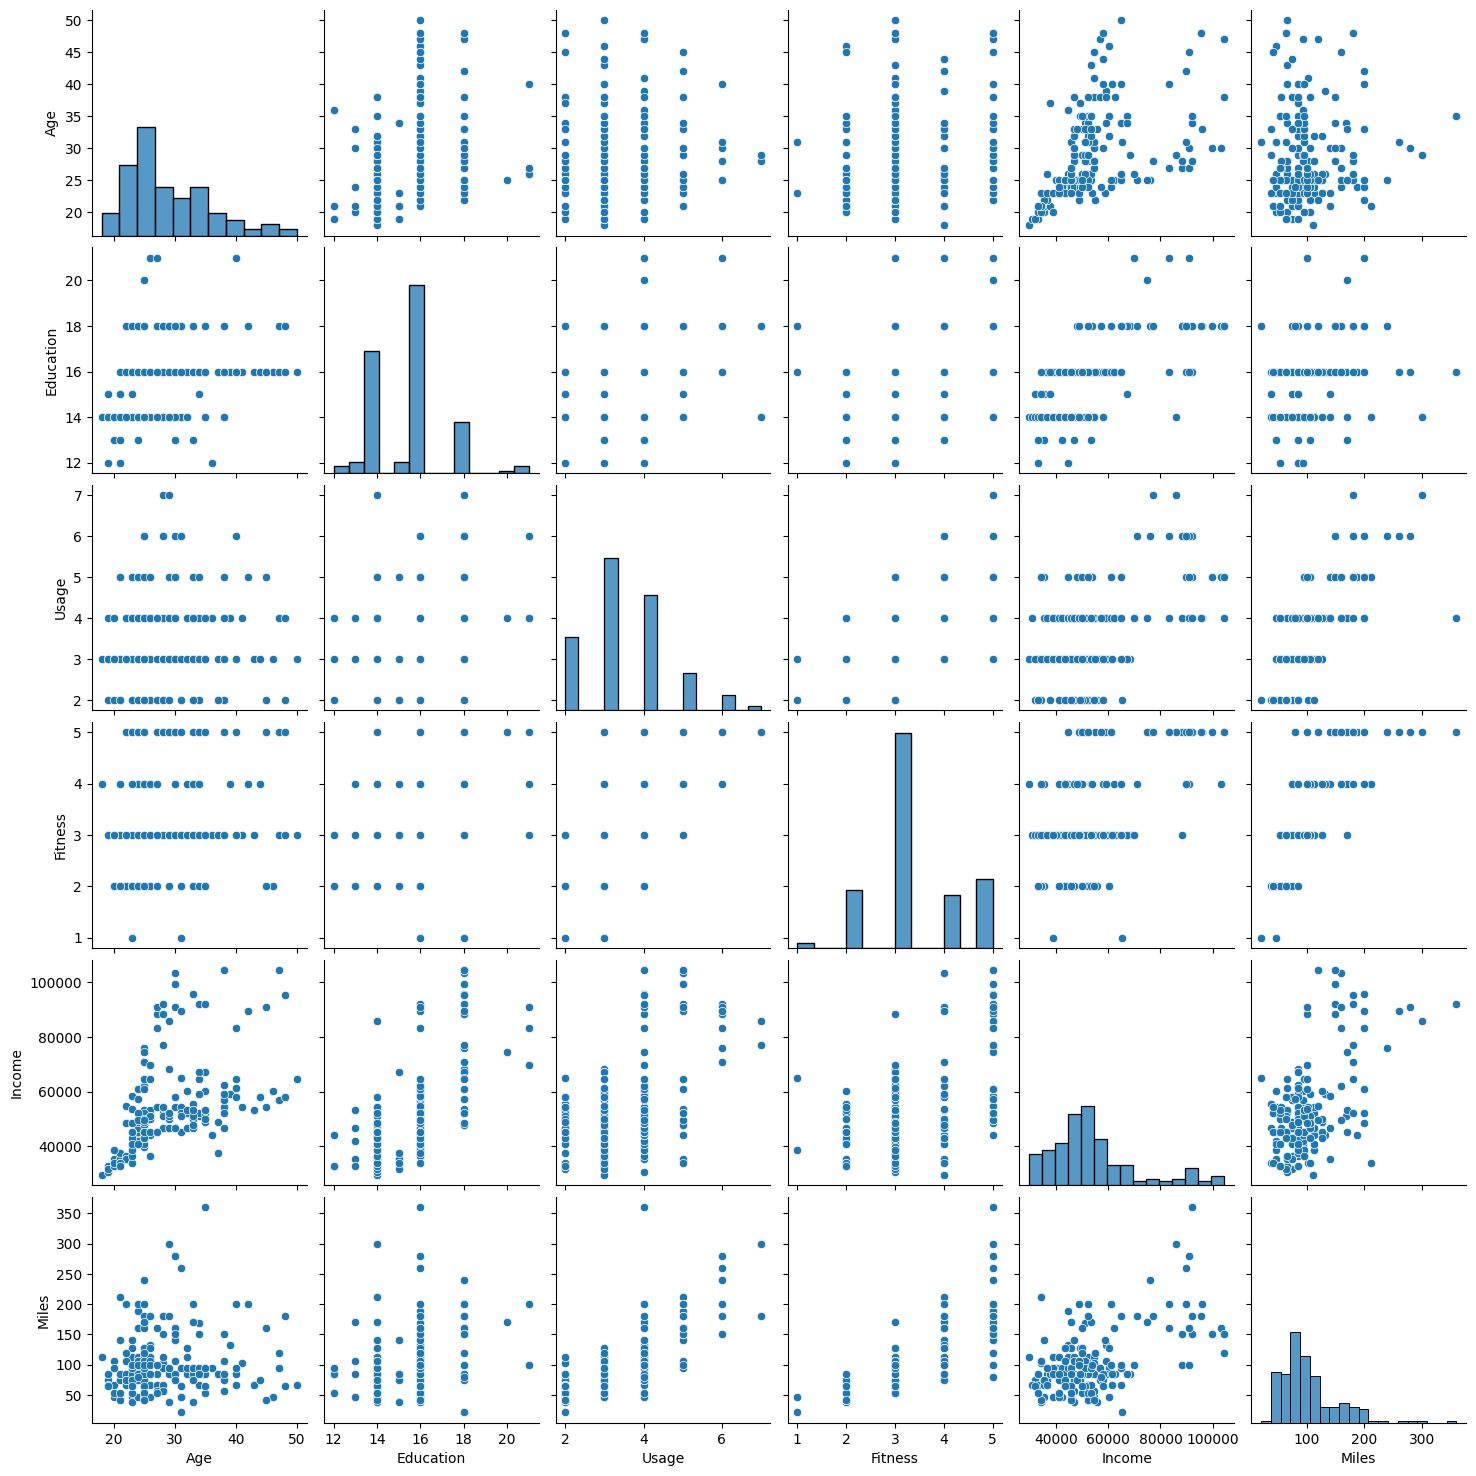

In [15]:
# Plot differents scatters plot
plt.figure(figsize=(7,5))
sns.pairplot(file)
plt.show()

/tmp/ipython-input-16-1659564701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file['Age']);


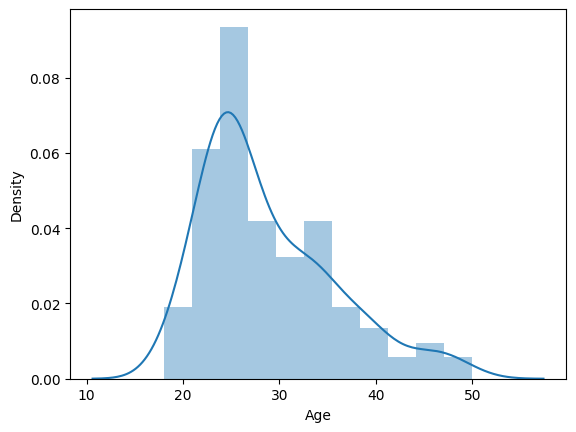

In [16]:
# Represents a histgram plot with a density line
sns.distplot(file['Age']);

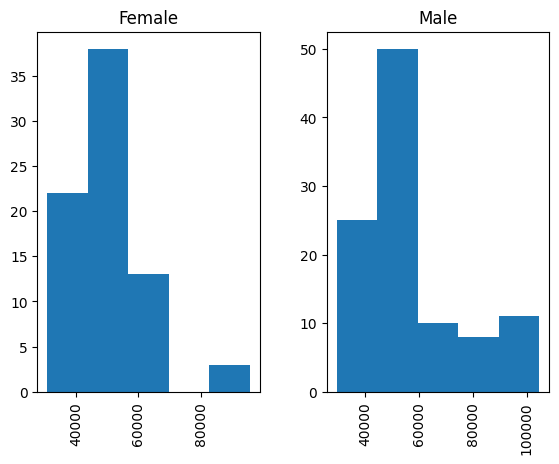

In [17]:
file.hist(by="Gender", column="Income", bins= 5);

In [19]:
# Select only the numeric columns before calculating correlation.
numerical_file = file.select_dtypes(include=np.number)
corr = numerical_file.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


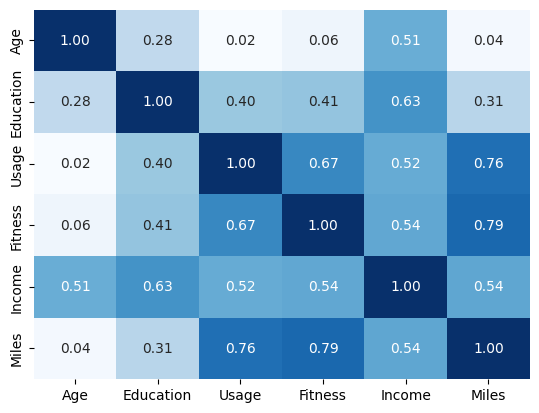

In [23]:
sns.heatmap(corr, annot=True, cbar=False, cmap="Blues", fmt=".2f");